In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import os

import add_features

from statsmodels.tsa.stattools import adfuller

%matplotlib inline

In [2]:
c_dir = "E:\\Datasets\\vindish\\"
e_dir = "E:\\Work/Vindish/created_samples/"

In [3]:
df = pd.read_csv(c_dir+"VIX Historical data 10 Min level since 2017 UX1_UX5.csv")

In [4]:
df.head()

,Time_To_Expiration,Date,UX1,UX2,UX3,UX4,UX5,SP500
0,8.9931,08/05/2017 23:30,11.40,12.45,13.68,14.35,15.20,2394.50
1,8.9861,08/05/2017 23:40,11.43,12.45,13.68,14.34,15.18,2394.75
2,8.9792,08/05/2017 23:50,11.43,12.48,13.67,14.30,15.20,2395.00
3,8.9722,09/05/2017,11.43,12.48,13.68,14.30,15.20,2395.00
4,8.9653,09/05/2017 00:10,11.43,12.45,13.68,14.30,15.20,2395.00


In [5]:
# df[df.UX1.isnull()].head()
print(df.shape)
# df = df[(df.UX1.notnull())&(df.UX2.notnull())&(df.UX3.notnull())&(df.UX4.notnull())&(df.UX5.notnull())]
df = df[df.apply(lambda x: x.notnull().all(), axis=1)]
print(df.shape)

(49969, 8)
(49951, 8)


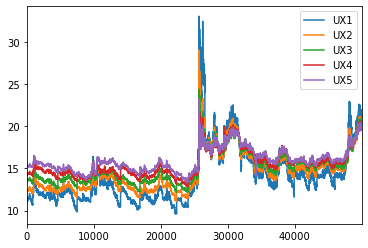

In [6]:
df.iloc[:, 2:7].plot()

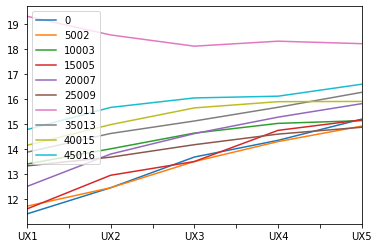

In [7]:
df.iloc[0:50000:5000, 2:7].T.plot()

In [8]:
df = add_features.drop_rows_with_null_dates(df)

drop nulls:
before: (49951, 8) 0
after: (49951, 8) 0


In [9]:
df.Date = pd.to_datetime(df.Date, dayfirst=True)

In [10]:
df = pd.concat([df, add_features.from_date_get_dow_dom_doy(df.Date)], axis=1)

In [11]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [12]:
df.head(100)

,Time_To_Expiration,Date,UX1,UX2,UX3,UX4,UX5,SP500,dow,dom,doy
0,8.9931,2017-05-08 23:30:00,11.40,12.45,13.68,14.35,15.20,2394.50,0,8,128
1,8.9861,2017-05-08 23:40:00,11.43,12.45,13.68,14.34,15.18,2394.75,0,8,128
2,8.9792,2017-05-08 23:50:00,11.43,12.48,13.67,14.30,15.20,2395.00,0,8,128
3,8.9722,2017-05-09 00:00:00,11.43,12.48,13.68,14.30,15.20,2395.00,1,9,129
4,8.9653,2017-05-09 00:10:00,11.43,12.45,13.68,14.30,15.20,2395.00,1,9,129
5,8.9583,2017-05-09 00:20:00,11.45,12.48,13.68,14.30,15.20,2395.00,1,9,129
6,8.9514,2017-05-09 00:30:00,11.45,12.48,13.68,14.30,15.20,2395.00,1,9,129
7,8.9444,2017-05-09 00:40:00,11.43,12.45,13.68,14.30,15.20,2395.00,1,9,129
8,8.9375,2017-05-09 00:50:00,11.43,12.45,13.68,14.30,15.20,2395.00,1,9,129
9,8.9306,2017-05-09 01:00:00,11.43,12.47,13.68,14.30,15.20,2394.75,1,9,129


In [13]:
diff_cols = [i+"_diff" for i in df.iloc[:, 2:8].columns]
df[diff_cols] = df.iloc[:, 2:8].diff()
df = df.iloc[1:, :]

In [14]:
df["day_of_month"] = df.Date.dt.day
df["day_of_week"] = df.Date.dt.dayofweek
df["day_of_year"] = df.Date.dt.dayofyear
df["time_of_day"] = df.Date.dt.hour

In [15]:
df.memory_usage().sum()//1000000

8

In [16]:
rol = df.iloc[:, 2:7].rolling(window=1000)

In [17]:
x = df.iloc[:11]

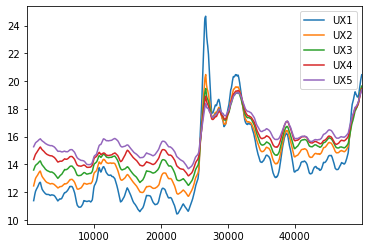

In [18]:
rol.mean().plot()

In [19]:
ux_vals = x[["UX1", "UX2", "UX3", "UX4", "UX5"]].iloc[:10].values
ux_vals

array([[11.43, 12.45, 13.68, 14.34, 15.18],
       [11.43, 12.48, 13.67, 14.3 , 15.2 ],
       [11.43, 12.48, 13.68, 14.3 , 15.2 ],
       [11.43, 12.45, 13.68, 14.3 , 15.2 ],
       [11.45, 12.48, 13.68, 14.3 , 15.2 ],
       [11.45, 12.48, 13.68, 14.3 , 15.2 ],
       [11.43, 12.45, 13.68, 14.3 , 15.2 ],
       [11.43, 12.45, 13.68, 14.3 , 15.2 ],
       [11.43, 12.47, 13.68, 14.3 , 15.2 ],
       [11.45, 12.45, 13.68, 14.3 , 15.15]])

In [20]:
df.dow.unique()

array([0, 1, 2, 3, 4, 6], dtype=int64)

In [21]:
df.head()

,Time_To_Expiration,Date,UX1,UX2,UX3,UX4,UX5,SP500,dow,dom,doy,UX1_diff,UX2_diff,UX3_diff,UX4_diff,UX5_diff,SP500_diff,day_of_month,day_of_week,day_of_year,time_of_day
1,8.9861,2017-05-08 23:40:00,11.43,12.45,13.68,14.34,15.18,2394.75,0,8,128,0.03,0.00,0.00,-0.01,-0.02,0.25,8,0,128,23
2,8.9792,2017-05-08 23:50:00,11.43,12.48,13.67,14.30,15.20,2395.00,0,8,128,0.00,0.03,-0.01,-0.04,0.02,0.25,8,0,128,23
3,8.9722,2017-05-09 00:00:00,11.43,12.48,13.68,14.30,15.20,2395.00,1,9,129,0.00,0.00,0.01,0.00,0.00,0.00,9,1,129,0
4,8.9653,2017-05-09 00:10:00,11.43,12.45,13.68,14.30,15.20,2395.00,1,9,129,0.00,-0.03,0.00,0.00,0.00,0.00,9,1,129,0
5,8.9583,2017-05-09 00:20:00,11.45,12.48,13.68,14.30,15.20,2395.00,1,9,129,0.02,0.03,0.00,0.00,0.00,0.00,9,1,129,0


In [42]:
save_dir = 'E:\\Datasets\\vindish'

df.to_pickle(save_dir+'\\df_all.pkl')

In [ ]:
def create_xy_from_df(x, verbose=False):
    x = x.drop("Date", axis=1)
    X = x.iloc[:10, :].values
    y = x[["UX1", "UX2", "UX3", "UX4", "UX5"]].iloc[10].values
    
    return X,y

In [ ]:
%%time
if os.path.exists(e_dir + "X.npy") and os.path.exists(e_dir + "y.npy"):
    X = np.load(e_dir + "X.npy")
    y = np.load(e_dir + "y.npy")
else:    
    Xs = []; ys=[]
    for i in tqdm(np.arange(11, df.shape[0]-1)):
    #     print(df.iloc[(i-11):i, :].shape)
        X, y= create_xy_from_df(df.iloc[(i-11):i, :])
        Xs.append(X)
        ys.append(y)
    X = np.stack(Xs)
    y = np.stack(ys)
    np.save(e_dir + "X.npy", X)
    np.save(e_dir + "y.npy", y)
    np.save(e_dir + "features.npy", np.array([i for i in df.columns if i!="Date"]))

In [ ]:
X.shape, y.shape